In [2]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
# from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.feature_selection import mutual_info_classif

from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
import pylab
from sklearn.neighbors import KNeighborsClassifier
import keras
from tensorflow.keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [5]:
train = pd.read_csv('train_NoNTTqq.csv')

In [6]:
train.head()

,id,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,alpha,delta,redshift,stellar
0,1,17.44385,15.71196,16.14848,15.647619,158.167937,29.746275,0.094857,1
1,2,22.02806,24.01481,21.16334,20.214615,145.916931,38.083063,0.361631,1
2,3,23.07242,21.79252,20.51945,18.159421,245.684677,49.908866,-0.000065,2
3,4,23.45985,23.41583,20.36645,20.220636,204.812750,33.137303,0.643375,1
4,5,23.89627,23.18005,21.12911,19.818470,209.254795,55.296589,0.486448,1


In [7]:
train['stellar'].unique()

array([1, 2, 3], dtype=int64)

In [8]:
train.shape

(134911, 9)

In [6]:
train.dtypes

id                        int64
ultraviolet_filter      float64
green_filter            float64
red_filter              float64
near_infrared_filter    float64
alpha                   float64
delta                   float64
redshift                float64
stellar                   int64
dtype: object

In [7]:
train.describe()

,id,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,alpha,delta,redshift,stellar
count,134911.000000,134911.000000,134911.000000,134911.00000,134911.000000,134911.000000,134911.000000,134911.000000,134911.000000
mean,67456.000000,21.954199,20.620361,19.52772,18.926294,176.110655,25.061154,0.473703,1.469191
std,38945.595421,2.357727,2.278216,2.08472,1.982872,91.469418,19.055886,0.621603,0.687563
min,1.000000,14.381980,8.645090,10.69846,10.477428,0.014814,-14.272665,-0.001592,1.000000
25%,33728.500000,20.009710,18.799620,17.73831,17.322310,136.827729,7.018153,0.027116,1.000000
50%,67456.000000,22.284200,21.168940,20.12401,19.275063,175.356844,25.857613,0.352549,1.000000
75%,101183.500000,23.651765,22.373330,21.03392,20.316915,219.337308,39.903438,0.596258,2.000000
max,134911.000000,27.842590,28.035390,26.89342,27.153450,359.875028,73.112284,6.500708,3.000000


In [58]:
test = pd.read_csv('test_SxgqOdc.csv')

In [11]:
test.head()

,id,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,alpha,delta,redshift
0,134912,19.63144,17.88840,16.45195,16.620047,336.501421,2.415351,0.000290
1,134913,25.74819,22.10760,19.97196,19.179141,210.286161,-1.336858,0.513781
2,134914,22.38767,20.85446,20.75418,20.073627,262.914770,46.025803,0.985297
3,134915,22.03212,23.15455,21.86528,20.746343,146.381732,38.368224,0.712391
4,134916,25.01815,24.53933,22.03248,22.377272,246.456081,30.515558,0.495552


In [59]:
test=test.drop(columns='id',axis=1)

In [60]:
test

,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,alpha,delta,redshift
0,19.63144,17.88840,16.45195,16.620047,336.501421,2.415351,0.000290
1,25.74819,22.10760,19.97196,19.179141,210.286161,-1.336858,0.513781
2,22.38767,20.85446,20.75418,20.073627,262.914770,46.025803,0.985297
3,22.03212,23.15455,21.86528,20.746343,146.381732,38.368224,0.712391
4,25.01815,24.53933,22.03248,22.377272,246.456081,30.515558,0.495552
...,...,...,...,...,...,...,...
89936,22.41481,21.55370,19.60544,18.617794,1.108111,30.528644,0.000479
89937,25.69069,22.74517,21.85320,21.419104,155.468306,37.207024,0.649914
89938,20.79857,19.29775,16.87349,16.802314,186.069454,23.731177,0.370957
89939,22.15261,20.10221,19.14552,18.521452,193.814800,29.493972,0.000959


In [12]:
sample = pd.read_csv('sample_submission_VdiYGti.csv')

In [13]:
sample.head()

,id,stellar
0,134912,1
1,134913,1
2,134914,1
3,134915,1
4,134916,1


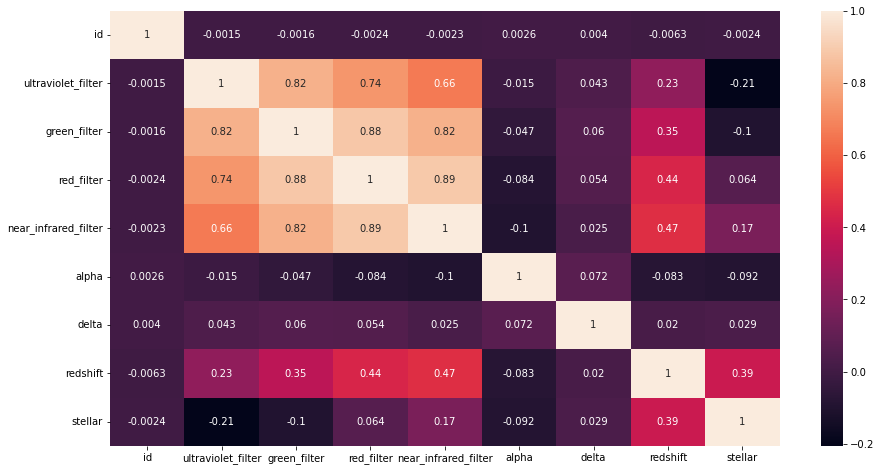

In [14]:
plt.figure(figsize = (15,8))
ax = sns.heatmap(train.corr(), annot=True)

In [13]:
# feature engg starts from here

In [15]:
train.isnull().sum()

id                      0
ultraviolet_filter      0
green_filter            0
red_filter              0
near_infrared_filter    0
alpha                   0
delta                   0
redshift                0
stellar                 0
dtype: int64

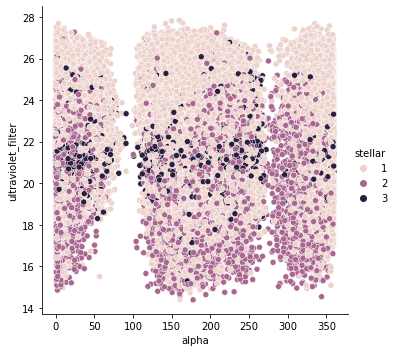

In [16]:
sns.relplot(x='alpha' , y = 'ultraviolet_filter', hue = 'stellar' , data=train)

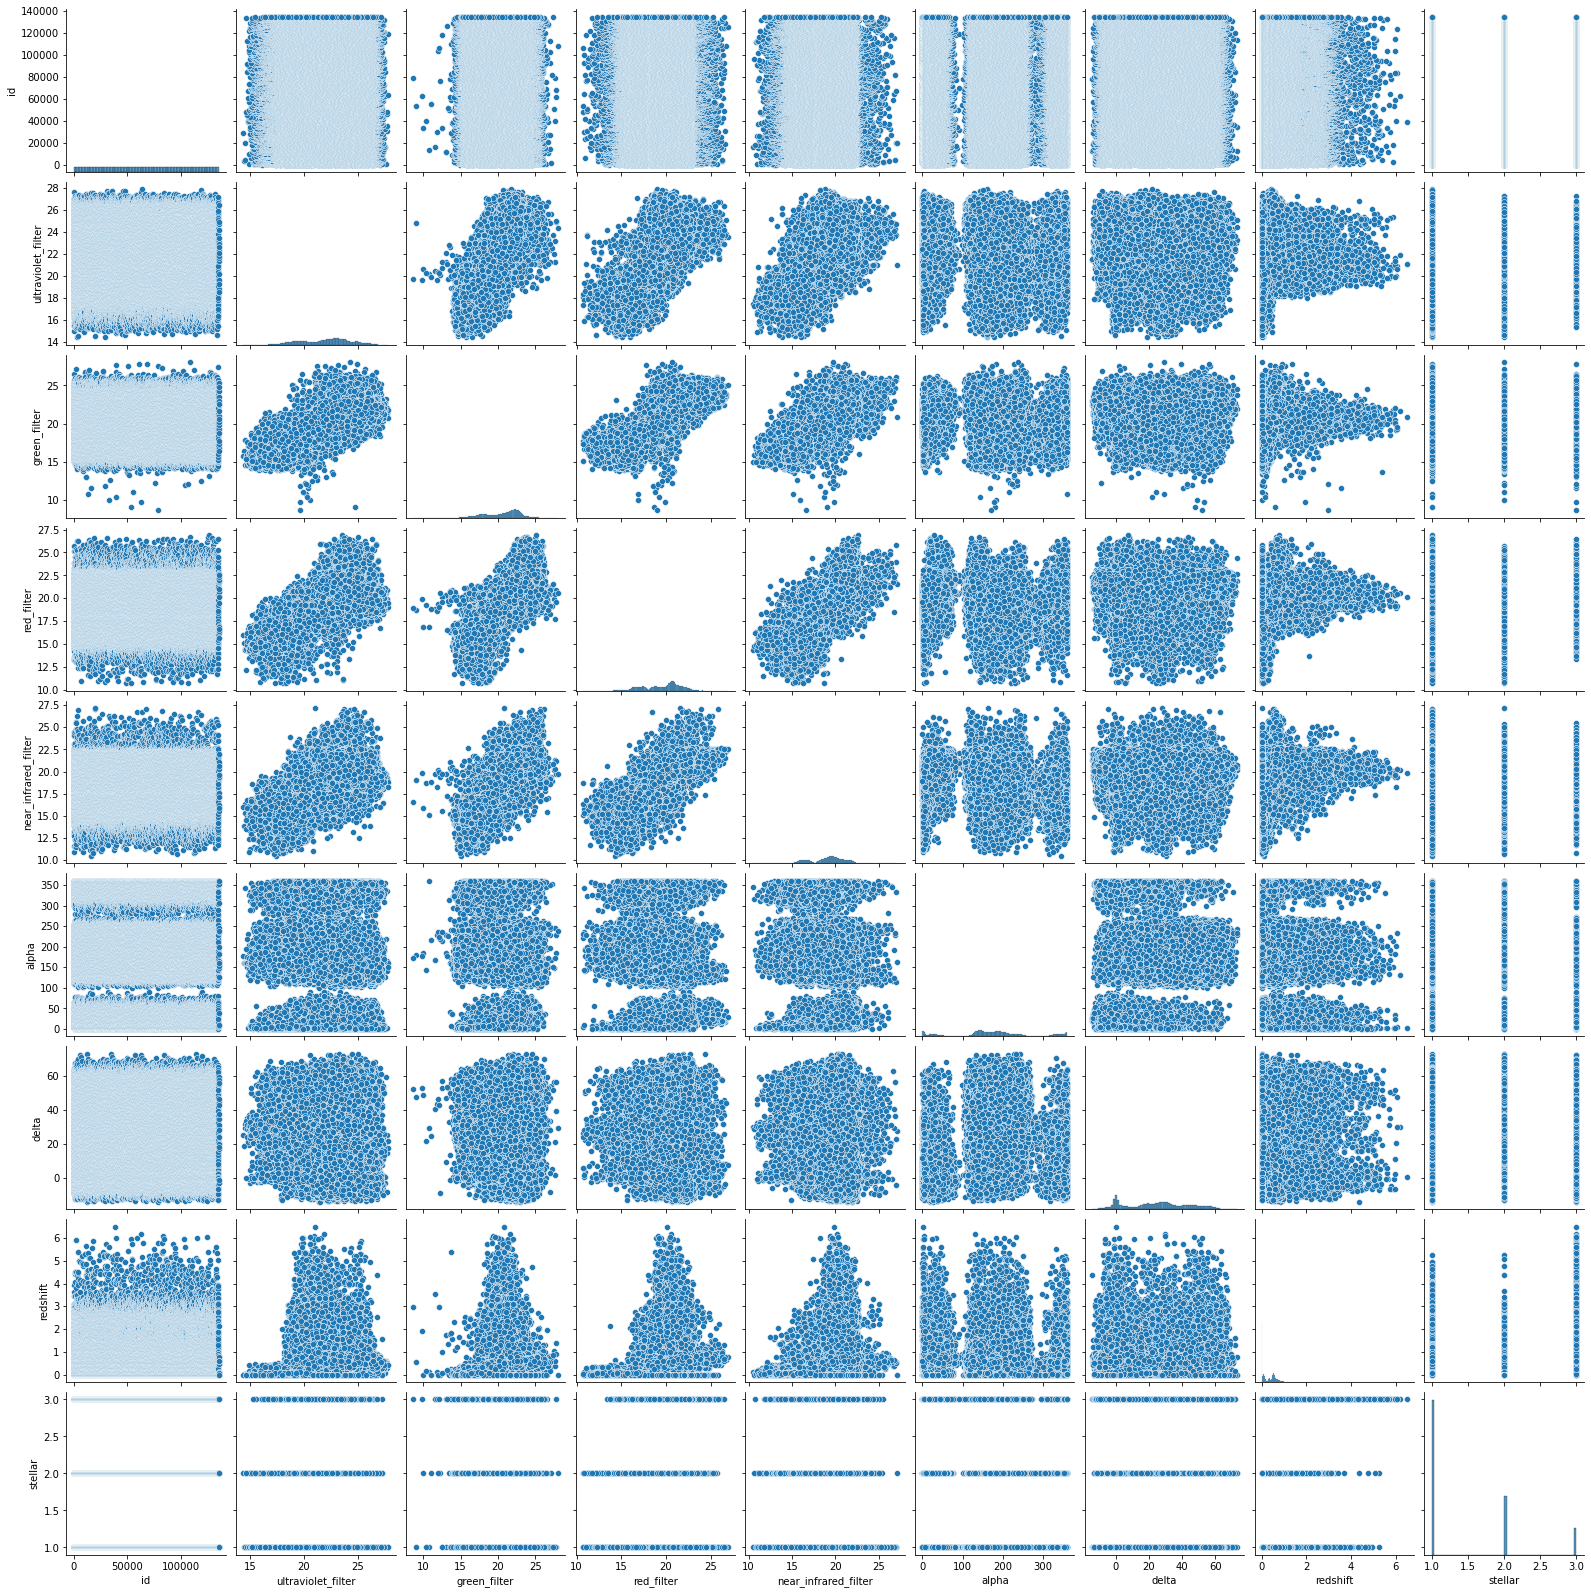

In [16]:
sns.pairplot(train)

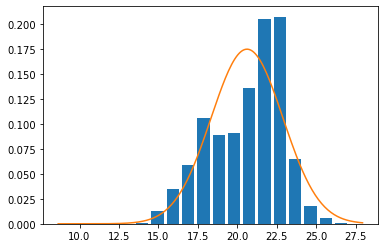

In [17]:
plt.hist(train['green_filter'], bins = 20, rwidth = 0.8, density = True)

rng = np.arange(train.green_filter.min(), train.green_filter.max(), 0.1)
plt.plot(rng, norm.pdf(rng, train.green_filter.mean(),train.green_filter.std()))

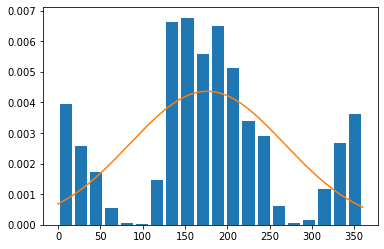

In [22]:
plt.hist(train['alpha'], bins = 20, rwidth = 0.8, density = True)

rng = np.arange(train.alpha.min(), train.alpha.max(), 0.1)
plt.plot(rng, norm.pdf(rng, train.alpha.mean(),train.alpha.std()))

In [15]:
train.columns

Index(['id', 'ultraviolet_filter', 'green_filter', 'red_filter',
       'near_infrared_filter', 'alpha', 'delta', 'redshift', 'stellar'],
      dtype='object')

In [22]:
# this is the function
def plot_data(df, feature):
    plt.figure(figsize = (10, 6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature], dist = 'norm', plot=pylab)
    plt.show()

In [32]:
# len(train[train['stellar']==1])
len(train[train['stellar']==3])

15089

In [33]:
train['stellar'].value_counts()

1    86701
2    33121
3    15089
Name: stellar, dtype: int64

In [36]:
train.columns

Index(['id', 'ultraviolet_filter', 'green_filter', 'red_filter',
       'near_infrared_filter', 'alpha', 'delta', 'redshift', 'stellar'],
      dtype='object')

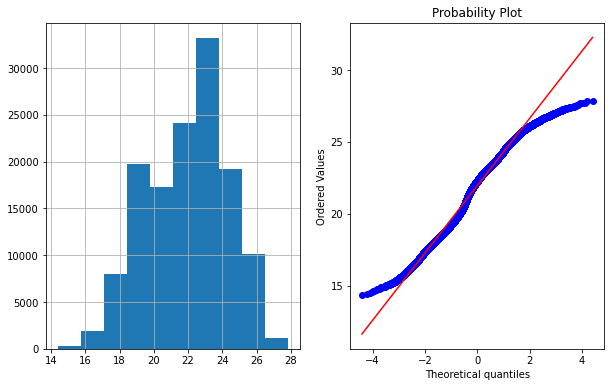

In [38]:
plot_data(train, 'ultraviolet_filter')

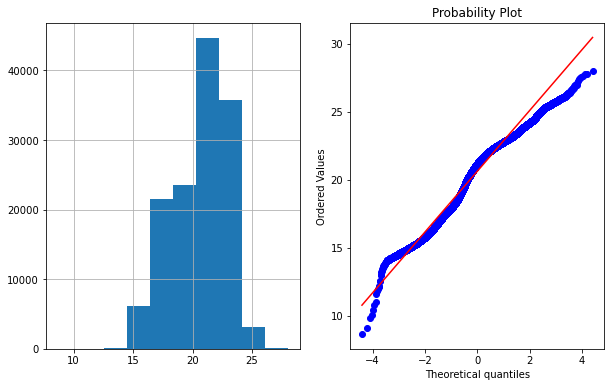

In [39]:
plot_data(train, 'green_filter')

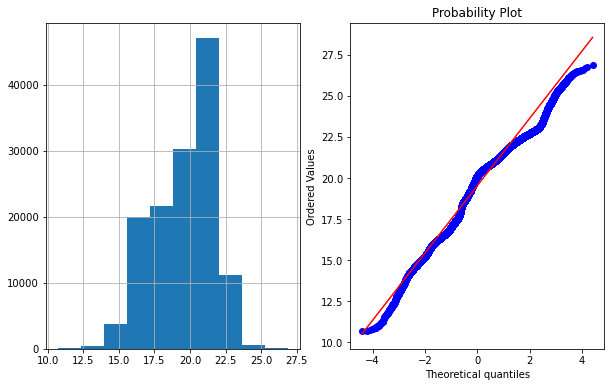

In [40]:
plot_data(train, 'red_filter')

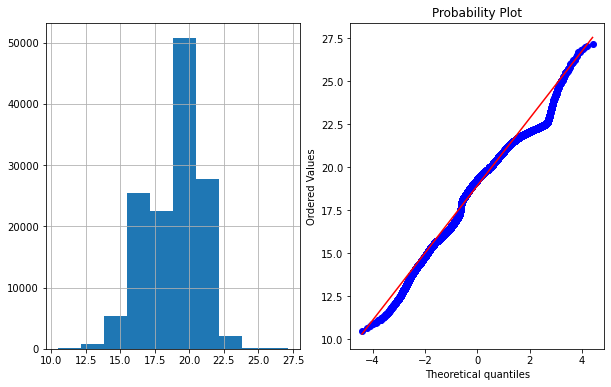

In [42]:
plot_data(train, 'near_infrared_filter')

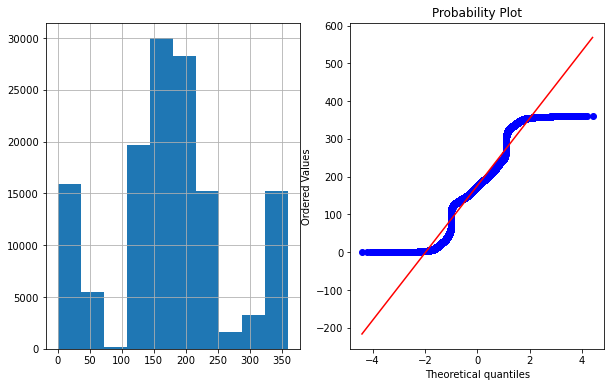

In [43]:
plot_data(train, 'alpha')

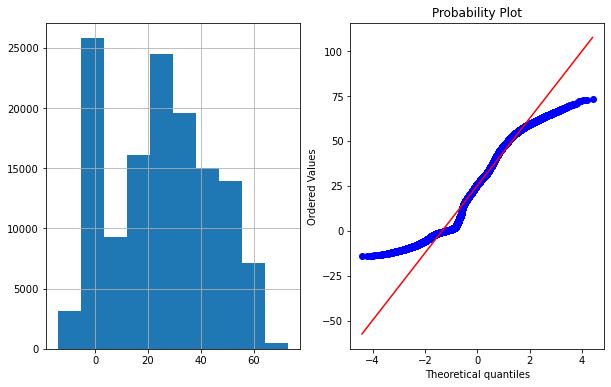

In [44]:
plot_data(train, 'delta')

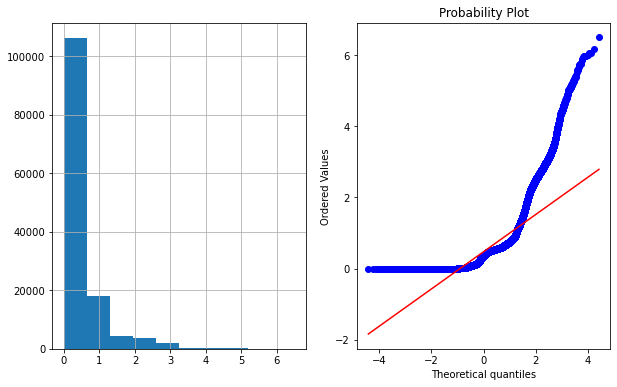

In [45]:
plot_data(train, 'redshift')

<AxesSubplot:>

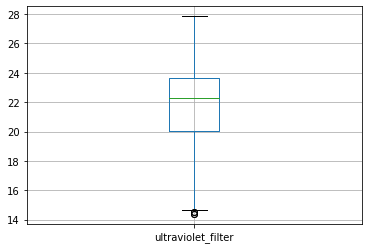

In [17]:
train.boxplot(column = 'ultraviolet_filter')

In [51]:
train.head()

,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,alpha,delta,yeo_redshift
0,17.44385,15.71196,16.14848,15.647619,158.167937,29.746275,0.084555
1,22.02806,24.01481,21.16334,20.214615,145.916931,38.083063,0.245408
2,23.07242,21.79252,20.51945,18.159421,245.684677,49.908866,-0.000065
3,23.45985,23.41583,20.36645,20.220636,204.812750,33.137303,0.346599
4,23.89627,23.18005,21.12911,19.818470,209.254795,55.296589,0.296269


In [54]:
# test.drop(['id'], axis = 1, inplace = True)
test.head()

,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,alpha,delta,redshift
0,19.63144,17.88840,16.45195,16.620047,336.501421,2.415351,0.000290
1,25.74819,22.10760,19.97196,19.179141,210.286161,-1.336858,0.513781
2,22.38767,20.85446,20.75418,20.073627,262.914770,46.025803,0.985297
3,22.03212,23.15455,21.86528,20.746343,146.381732,38.368224,0.712391
4,25.01815,24.53933,22.03248,22.377272,246.456081,30.515558,0.495552


In [46]:
# train['log_redshift'] = train['redshift']+1
train['log_redshift']= np.log(train['log_redshift'])

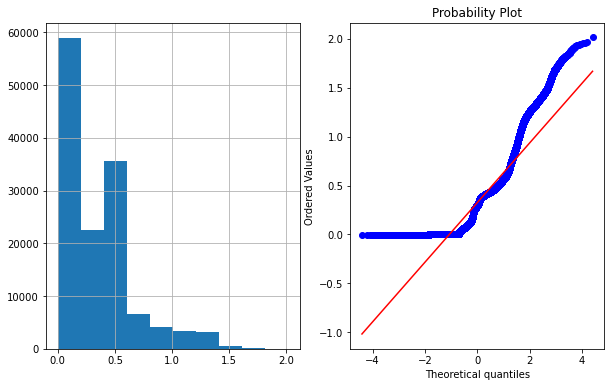

In [48]:
plot_data(train, 'log_redshift')

In [71]:
# train.drop(['log_redshift'], axis =1 , inplace = True)
test.drop(['redshift'], axis =1 , inplace = True)

In [20]:
# training a random model to get a submission in

y = train['stellar']

In [21]:
train.drop(['stellar'], axis = 1, inplace = True)
train.drop(['id'], axis = 1, inplace = True)
# train.drop(['redshift'], axis = 1, inplace = True)

In [22]:
train

,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,alpha,delta,redshift
0,17.44385,15.71196,16.14848,15.647619,158.167937,29.746275,0.094857
1,22.02806,24.01481,21.16334,20.214615,145.916931,38.083063,0.361631
2,23.07242,21.79252,20.51945,18.159421,245.684677,49.908866,-0.000065
3,23.45985,23.41583,20.36645,20.220636,204.812750,33.137303,0.643375
4,23.89627,23.18005,21.12911,19.818470,209.254795,55.296589,0.486448
...,...,...,...,...,...,...,...
134906,19.24538,18.80673,16.41091,15.609013,6.218972,19.934894,0.049424
134907,23.41124,22.59072,22.50731,22.023594,152.664791,46.368871,0.610840
134908,21.76064,20.16531,20.07795,20.315816,358.506516,42.845364,2.133721
134909,18.55473,17.70518,16.67601,15.922038,160.649389,18.329627,0.052593


In [18]:
# train.shape
mutual_info = mutual_info_classif(train, y)
mutual_info= pd.Series(mutual_info)
mutual_info.index = train.columns

NameError: name 'y' is not defined

In [48]:
mutual_info

ultraviolet_filter      0.109339
green_filter            0.097265
red_filter              0.058225
near_infrared_filter    0.072287
alpha                   0.054371
delta                   0.086307
yeo_redshift            0.631606
dtype: float64

In [19]:
# test.head()
# test.drop(['redshift'],  axis = 1, inplace = True)
test.drop(['id'],  axis = 1, inplace = True)

In [66]:

# model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# clf = RandomForestClassifier(n_estimators = 100) 

In [180]:
clf.fit(scaled, y)

RandomForestClassifier()

In [18]:
y==3

array([False, False, False, ..., False, False, False])

In [23]:
le = LabelEncoder()
y = le.fit_transform(y)

In [181]:
hehe=clf.predict(scaled_test)

In [182]:
hehe

array([0, 0, 2, ..., 0, 1, 0], dtype=int64)

In [171]:
df =sample

In [183]:
df.head()

,id,stellar
0,134912,0
1,134913,0
2,134914,2
3,134915,0
4,134916,0


In [61]:
hehe

array([0, 0, 2, ..., 0, 1, 0], dtype=int64)

In [185]:
df['stellar'] = hehe

In [184]:
 df.drop(['stellar'], axis = 1, inplace = True)

In [186]:
df.to_csv('file4.csv')

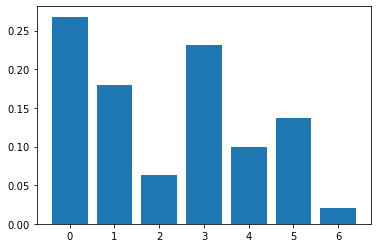

In [81]:
# plot
plt.bar(range(len(xgbc.feature_importances_)), xgbc.feature_importances_)
plt.show()

In [8]:
sample.loc[sample['stellar'] == 0]

,id,stellar


In [ ]:
sample

In [56]:
fitted_data, fitted_lambda = stats.yeojohnson(test['redshift'])
# fitted_data, fitted_lambda = stats.yeojohnson(train['redshift'])

In [17]:
train.head()

,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,alpha,delta,redshift
0,17.44385,15.71196,16.14848,15.647619,158.167937,29.746275,0.094857
1,22.02806,24.01481,21.16334,20.214615,145.916931,38.083063,0.361631
2,23.07242,21.79252,20.51945,18.159421,245.684677,49.908866,-0.000065
3,23.45985,23.41583,20.36645,20.220636,204.812750,33.137303,0.643375
4,23.89627,23.18005,21.12911,19.818470,209.254795,55.296589,0.486448


In [57]:
fitted_data

array([2.90310766e-04, 3.06344701e-01, 4.23297331e-01, ...,
       2.49840243e-01, 9.57863952e-04, 1.15054372e-01])

In [58]:
# test['redshift_yeo'] = fitted_data
test['yeo_redshift'] = fitted_data

In [43]:
train.drop(['redshift'], axis = 1, inplace = True)
# train['log_redshift'] = np.log(train['redshift']+1)
# test['log_redshift'] = np.log(test['redshift']+1)

KeyError: "['redshift'] not found in axis"

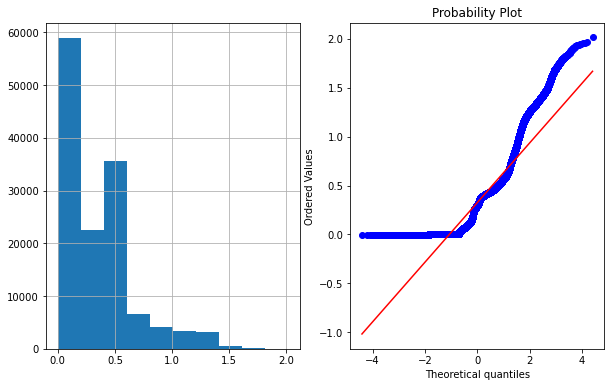

1.2726212053007335

In [30]:
plot_data(train, 'log_redshift')
train['log_redshift'].skew()

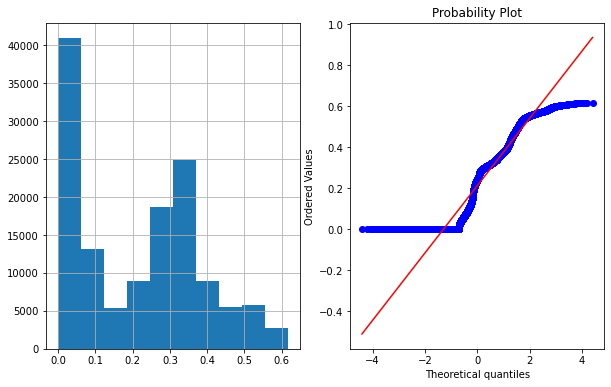

0.18970162221157322

In [32]:
plot_data(train, 'yeo_redshift')
train['yeo_redshift'].skew()

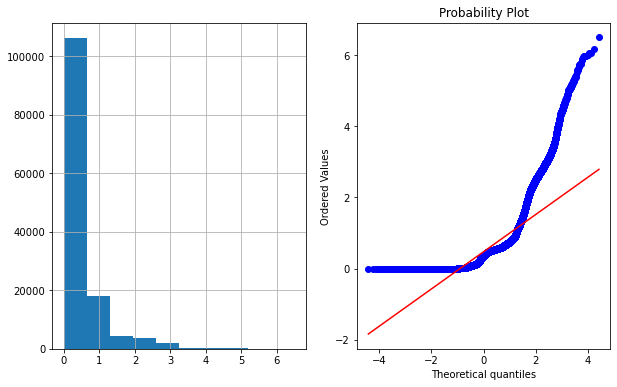

2.648031917876083

In [38]:
plot_data(train, 'redshift')
train['redshift'].skew()

In [62]:
df= df.reset_index(drop = True)

In [33]:
def  outliers(df, feature):
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    
    lower_range = df[feature].quantile(0.25) - (IQR*1.5)
    upper_range = df[feature].quantile(0.75) + (IQR*1.5)
    
    print(lower_range, upper_range)
    

In [36]:
outliers(train, 'alpha')
upper_range = 343.1016
lower_range = 13.0633

13.063361532647207 343.1016757814253


In [34]:
outliers(train, 'yeo_redshift')

-0.43368850129183406 0.7927033044668408


In [39]:
# capping

# tips_ds["tip_capped"] = np.where(tips_ds["tip"]> upper_limit, upper_limit,
#                         np.where(tips_ds["tip"]< lower_limit, lower_limit,
#                         tips_ds["tip"]))
                               
    
train_cap['alpha'] = np.where(train_cap['alpha'] > upper_range, upper_range,
                             np.where(train_cap['alpha'] < lower_range, lower_range,
                                     train_cap['alpha']))

In [37]:
train[train['yeo_redshift'] < -0.4336]

,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,alpha,delta,redshift,yeo_redshift,log_redshift


In [145]:
train_1.shape

(125708, 9)

In [146]:
# train[train['redshift'] >1.4499]
# train[train['redshift'] < (-0.826596)]
# train[train['alpha'] > 343.101]
# new_df = train[train['alpha'] > 13.0633]
# new_df_1 = new_df[new_df['alpha'] < 343.101]
# train[train['redshift'] < -0.08265 |
# train_1 = train_1[train_1['redshift'] <1.4499]
y = train_1['stellar']

In [159]:
# train.drop(['stellar'],  axis = 1 , inplace = True)
# train.drop(['redshift'],  axis = 1 , inplace = True)
test.drop(['redshift_yeo','id'],  axis = 1 , inplace = True)
# y

In [175]:
# scaling min max

# test.drop(['id'],axis = 1, inplace = True)
# train.drop(['red_filter'], axis = 1, inplace = True)
test.drop(['red_filter'], axis = 1, inplace = True)


In [47]:
y = train['stellar']

In [286]:
scaler = MinMaxScaler()
# trans = RobustScaler()
# quantile = QuantileTransformer(output_distribution='normal')
# data_trans = quantile.fit_transform(train)
# data_trans = quantile.fit_transform(test)
# scaled = scaler.fit_transform(train)
scaled = scaler.fit_transform(test)
# scaled = trans.fit_transform(train)
# scaled = trans.fit_transform(test)


In [287]:
scaled_test = pd.DataFrame(scaled, columns = ['ultraviolet_filter', 'green_filter', 'red_filter',
       'near_infrared_filter', 'alpha', 'delta', 'redshift'])

In [177]:
train =train_2
test = test_2
xgb = XGBClassifier()

In [10]:
train.drop(['id','stellar'], axis = 1, inplace = True)

In [180]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    clf=xgXGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [181]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

job exception: name 'X_train' is not defined



  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]


NameError: name 'X_train' is not defined

In [67]:
# clf = RandomForestClassifier(n_estimators = 3000) 
# dtc = DecisionTreeClassifier()
# xgbc.fit(scaled_train, y)
xgbc.fit(train, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [283]:
# train= train_1
# test=test_1

In [184]:
# test.drop(['redshift'], axis =1, inplace = True)
# test
xgbc = XGBClassifier(base_score = 1, learning_rate = 0.5, max_depth =10)

In [ ]:
xgb_1.fit(scaled_train,y)

In [251]:
y

array([0, 0, 1, ..., 2, 0, 1], dtype=int64)

In [273]:
hehe = xgb_1.predict(scaled_test)

In [64]:
y_pred = y_pred + 1

In [85]:
y_pred

array([1, 1, 3, ..., 3, 3, 1])

In [274]:
hehe

array([1, 0, 2, ..., 0, 1, 0])

In [107]:
df = sample

In [108]:
df.drop(['stellar'], axis = 1 , inplace = True)
df.drop(['stellar'], axis = 1 , inplace = True)


In [99]:
df['stellar'] = y_pred

In [100]:
df

,id,stellar
0,134912,1
1,134913,1
2,134914,3
3,134915,1
4,134916,1
...,...,...
89936,224848,1
89937,224849,1
89938,224850,3
89939,224851,3


In [101]:
df.to_csv(r'C:\Users\lenovo\Desktop\file4.csv')

In [150]:
# test.drop(['red_filter'], axis =1, inplace = True)
train_2 =train
test_2 =test

In [204]:
# hyperparameter tuning

space={ 'learning_rate' : [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
        'max_depth' : [3,4,5,6,7,8,9,10],
        'gamma' : [0,0.1,0.2,0.3, 0.4],
        'colsample_bytree' : [0.3, 0.4, 0.5, 0.6, 0.7],
        'n_estimators': [180, 200,300,400,500, 600]
    }


In [205]:
classifier=XGBClassifier()
random_search = RandomizedSearchCV(classifier,param_distributions = space, n_iter = 5, scoring = 'roc_auc', n_jobs = 1, cv =5, verbose = 3)

In [206]:
random_search.fit(train,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.6, max_depth=10, n_estimators=200;, score=nan total time=  36.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.6, max_depth=10, n_estimators=200;, score=nan total time=  37.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.6, max_depth=10, n_estimators=200;, score=nan total time=  38.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.6, max_depth=10, n_estimators=200;, score=nan total time=  37.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.6, max_depth=10, n_estimators=200;, score=nan total time=  37.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=7, n_estimators=180;, score=nan total time=  24.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=7, n_estimators=180;, score=nan total time=  24.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=7, n_estimators=180;, score=nan total time=  24.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=7, n_estimators=180;, score=nan total time=  24.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=7, n_estimators=180;, score=nan total time=  24.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 1/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.4, max_depth=8, n_estimators=400;, score=nan total time= 1.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 2/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.4, max_depth=8, n_estimators=400;, score=nan total time= 1.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 3/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.4, max_depth=8, n_estimators=400;, score=nan total time= 1.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 4/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.4, max_depth=8, n_estimators=400;, score=nan total time= 1.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 5/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.4, max_depth=8, n_estimators=400;, score=nan total time= 1.1min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 1/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=7, n_estimators=600;, score=nan total time= 1.4min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 2/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=7, n_estimators=600;, score=nan total time= 1.4min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 3/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=7, n_estimators=600;, score=nan total time= 1.4min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 4/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=7, n_estimators=600;, score=nan total time= 1.4min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 5/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.3, max_depth=7, n_estimators=600;, score=nan total time= 1.4min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 1/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.3, max_depth=9, n_estimators=400;, score=nan total time= 1.2min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 2/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.3, max_depth=9, n_estimators=400;, score=nan total time= 1.2min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 3/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.3, max_depth=9, n_estimators=400;, score=nan total time= 1.2min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[CV 4/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.3, max_depth=9, n_estimators=400;, score=nan total time= 1.2min


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


[CV 5/5] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.3, max_depth=9, n_estimators=400;, score=nan total time= 1.2min


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [207]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.6, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [208]:
random_search.best_params_

{'n_estimators': 200,
 'max_depth': 10,
 'learning_rate': 0.6,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [102]:
xgb_1 = XGBClassifier(n_estimators=300, max_depth=8, learning_rate = 0.6, gamma = 0.4, colsample_bytree = 0.4, num_class =3, objective='multi:softmax',subsample=0.2)

In [103]:
xgb_1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.6, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_class=3, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=0, ...)

In [104]:
y_pred=xgb_1.predict(test)

In [39]:
from sklearn.metrics import f1_score

In [82]:
f1_score(y_test, y_pred, average='macro')

0.9101846158034426

In [90]:
y_pred

array([0, 0, 2, ..., 2, 2, 0])

In [105]:
y_pred=y_pred+1

In [92]:
y_pred.shape

(89941,)

In [106]:
y_pred

array([1, 1, 3, ..., 1, 1, 1])

In [50]:
y_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
 X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.02, random_state=42)

In [28]:
X_train

,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,alpha,delta,redshift
54134,19.70774,17.73397,16.52692,16.223054,322.295137,19.514735,0.163031
16264,23.02002,20.09090,19.49554,18.848231,356.265454,2.274764,0.364791
121,17.78490,16.76043,15.64974,16.297677,5.620899,19.977293,0.079499
123264,23.55760,23.61523,22.50390,20.808223,24.086600,18.398705,0.537432
50596,24.95568,23.20258,21.57130,20.357769,128.984595,54.428030,0.490598
...,...,...,...,...,...,...,...
110268,20.14777,17.77010,18.47269,17.106910,139.635949,30.889853,0.131568
119879,23.45955,21.17758,18.26170,18.711482,202.682329,38.237061,0.327323
103694,18.12063,15.65827,16.38838,16.519498,160.870867,29.188779,-0.001514
131932,22.09321,21.42873,20.50192,18.473654,308.363495,16.536519,0.545650


In [221]:
train.head()

,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,alpha,delta,redshift
0,17.44385,15.71196,16.14848,15.647619,158.167937,29.746275,0.094857
1,22.02806,24.01481,21.16334,20.214615,145.916931,38.083063,0.361631
2,23.07242,21.79252,20.51945,18.159421,245.684677,49.908866,-0.000065
3,23.45985,23.41583,20.36645,20.220636,204.812750,33.137303,0.643375
4,23.89627,23.18005,21.12911,19.818470,209.254795,55.296589,0.486448


In [29]:
X_test

,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,alpha,delta,redshift
29746,24.44747,23.26647,23.19652,20.026433,245.285795,38.219368,0.488859
19341,17.68367,15.50349,14.77892,14.140815,190.569872,27.904941,0.048152
104459,16.63015,16.48323,17.00963,16.321605,163.780138,35.018280,0.070484
13695,23.34506,22.43970,21.00613,20.359086,131.368630,42.657065,0.512297
27059,22.60671,21.37752,21.13182,21.332682,235.602814,40.212396,0.000253
...,...,...,...,...,...,...,...
4656,19.94848,18.50671,17.34429,16.384787,199.985087,25.571281,0.092278
126116,23.99509,22.59913,21.18453,22.149754,30.938350,-0.953516,0.001360
28175,18.92175,18.35407,16.73659,16.234675,184.460436,24.594111,-0.000845
87415,22.56746,20.30214,19.41067,18.875010,195.334370,36.730265,0.477627


In [239]:
train=train_1

In [220]:
train.drop(['id','stellar'],axis = 1, inplace = True)

In [248]:
test

,ultraviolet_filter,green_filter,red_filter,near_infrared_filter,alpha,delta,redshift
0,19.63144,17.88840,16.45195,16.620047,336.501421,2.415351,0.000290
1,25.74819,22.10760,19.97196,19.179141,210.286161,-1.336858,0.513781
2,22.38767,20.85446,20.75418,20.073627,262.914770,46.025803,0.985297
3,22.03212,23.15455,21.86528,20.746343,146.381732,38.368224,0.712391
4,25.01815,24.53933,22.03248,22.377272,246.456081,30.515558,0.495552
...,...,...,...,...,...,...,...
89936,22.41481,21.55370,19.60544,18.617794,1.108111,30.528644,0.000479
89937,25.69069,22.74517,21.85320,21.419104,155.468306,37.207024,0.649914
89938,20.79857,19.29775,16.87349,16.802314,186.069454,23.731177,0.370957
89939,22.15261,20.10221,19.14552,18.521452,193.814800,29.493972,0.000959


In [30]:
from sklearn.model_selection import cross_val_score

In [33]:
scores = cross_val_score(xgb_1, X_train, y_train, cv=3)

In [34]:
scores

array([0.93661839, 0.94047574, 0.93937675, 0.94160805, 0.93937675])

In [245]:
test=test_1

In [247]:
test.drop(['id'], axis = 1, inplace = True)